# Network Analysis with NetworkX
One key progression when working with network data is to shift your understanding beyond simply thinking of them as visualisations that we can qualitatively interpret, but also as models for structuring data in a relational way that allows us to ask different kinds of questions.

Furthermore, network analysis can be in and of itself a method of analysis, but it can also form a part of a larger analysis. For example by using network analysis to identify community partitions you can create a categorical variable to then subdivide your data during exploratory analysis.

Rather than turn to Gephi, we can use NetworkX for this relational modelling and analysis.

#### [NetworkX](https://networkx.org) is a Python library for creating, analysing, and visualising networks
* written in pure Python
* flexible and easy to install
* relatively scalable

In [ ]:
import json
! conda install -c conda-forge networkx pandas scipy seaborn --yes

In [1]:
# Import networkx and other packages we will use

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

### Create a network
We'll create a small toy network directly using NetworkX. This will...

- Show us how we can directly construct a network model using python.
- Give us a small human readable network that we can then test different metrics on.

In [2]:
# Create an empty network
G = nx.Graph()
# G = nx.DiGraph() # Creates a directed network

# Add nodes
G.add_node(1)

# Or add a set of nodes from a list
G.add_nodes_from([2, 3, 4, 5, 6])
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [3]:
# Add edges
G.add_edge(1, 2)
G.add_edge(2, 4)

# Or add a set of edges from a list

node_list = [(1, 4), (3, 4), (1, 5), (2, 6), (5,6)]

G.add_edges_from(node_list)

In [4]:
# Check the created edges
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (2, 4), (2, 6), (3, 4), (5, 6)])

In [5]:
# Check basic properties of the graph

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6
Number of edges: 7


NetworkX has some visualisation features, based on Matplotlib. Note that it will struggle to provide coherent visuals of very large networks, such as Twitter networks (more on this later).

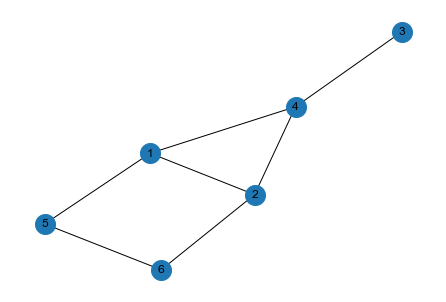

In [6]:

# Draw a network

nx.draw(G, with_labels=True,node_size=400)

# Note that without a provided layout, the network visual will change each run.

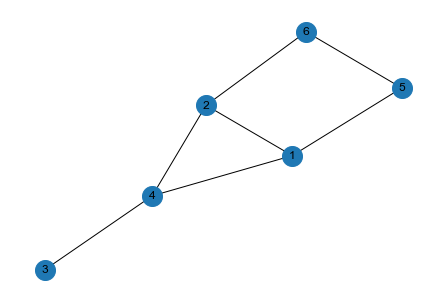

In [8]:
layout = nx.fruchterman_reingold_layout(G, seed=1) # seed ensures we all get the same graph rather than it being random.

nx.draw(G, pos=layout, with_labels=True,node_size=400)


In [10]:
# Basic network properties
G.degree

DegreeView({1: 3, 2: 3, 3: 1, 4: 3, 5: 2, 6: 2})

In [11]:
# Captuturing it in a dataframe

pd.DataFrame(G.degree, columns=['id','degree'])

,id,degree
0,1,3
1,2,3
2,3,1
3,4,3
4,5,2
5,6,2


### Add node attributes

In [12]:
# Add attributes to existing nodes

G.nodes[1]['team'] = "A"
G.nodes[2]['team'] = "A"
G.nodes[3]['team'] = "B"
G.nodes[4]['team'] = "B"
G.nodes[5]['team'] = "A"
G.nodes[6]['team'] = "A"

In [13]:
# Assign different colour to nodes with different attributes
node_color = ['#a5b41f' if G.nodes[v]["team"] == "A"
    else '#1fb4a5' for v in G]

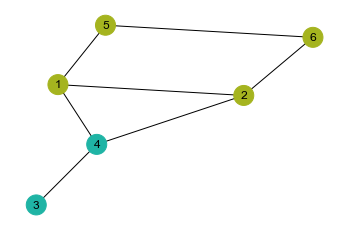

In [14]:
# Plot the network with node colours representing team categories

nx.draw_networkx(G, with_labels=True, node_color=node_color,node_size=400)

plt.axis('off')
plt.show()

In [27]:
# You can examine the attributes with a keyword to G.nodes
G.nodes(data=True)

NodeDataView({1: {'team': 'A'}, 2: {'team': 'A'}, 3: {'team': 'B'}, 4: {'team': 'B'}, 5: {'team': 'A'}, 6: {'team': 'A'}})

### Directed network
Whether you use a directed or undirected network is a decision based on what the network represents. Is there some directionality to the relations between nodes, or does that not matter?
- Friendships
- Communication
- Word co-occurence
- Cash/wealth flows between people.

In [28]:
# Create an empty directed network
DG = nx.DiGraph()

# Add nodes
DG.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges
DG.add_edges_from([(1, 2),(2, 4),(1, 4), (3, 4), (1, 5), (2, 6), (5,6)])

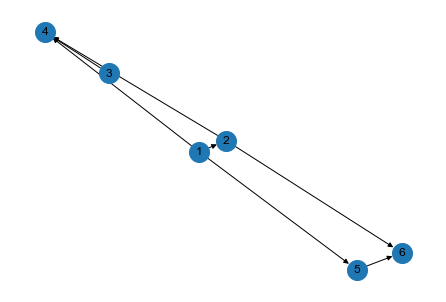

In [29]:
# Draw the directed network

nx.draw(DG, with_labels=True,node_size=400)

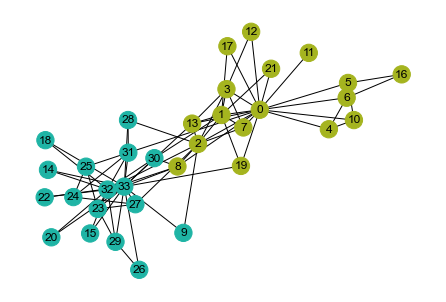

In [51]:
karate = nx.karate_club_graph()
layout = nx.fruchterman_reingold_layout(karate,)
node_color = ['#a5b41f' if karate.nodes[v]["club"] == "Mr. Hi"
              else '#1fb4a5' for v in karate]
nx.draw(karate, pos=layout,with_labels=True, node_color=node_color)

In [37]:
# You can also determine if a graph is directed like so...

print( G.is_directed() )
print( DG.is_directed() )

False
True


# Exercise 1
Below we will load in a new example graph called the Karate club graph. Can you answer the following questions?
1. How many nodes and edges in the graph?
2. Which node has the most connections? (Use Pandas to help you)
3. Is the karate club graph directed or undirected?
4. If you draw the graph, use a fruchterman_rheingold layout and use the node attribute 'club' to colour the nodes, what do you see?

The karate club graph was produced by Anthropologist Wayne Zachary as part of his ethnographic work observing the interactions between members outside of the club setting such as classes, bars, other sports clubs etc.

Each node represents a club member, each edge represents association outside of the club.


*Zachary, W.W. (1977) ‘An Information Flow Model for Conflict and Fission in Small Groups’, Journal of Anthropological Research, 33(4), pp. 452–473.*

In [49]:
karate_G = nx.karate_club_graph()

In [ ]:
# Write you code for exercise 1 below




Graph Metrics

In this section we use the full [Star Wars Social Network](https://www.kaggle.com/datasets/ruchi798/star-wars). Each node represents a character and each edge represents the number of times a pair of characters appeared together in a scene of the movie. Edges are undirected and weighted, and we also have the total number of scenes a character appeared in.

In [190]:
with open('star_wars/starwars-full-interactions-allCharacters.json','r') as f:
    file = json.load(f)

node_list = pd.DataFrame(file['nodes'])[['name','value']].rename(columns={'value':'n_scenes'})
node_list.to_csv('star_wars_node_list.csv')

edge_list = pd.DataFrame(file['links']).rename(columns={'value':'weight'})
edge_list['source'] = edge_list['source'].map(node_list['name'].to_dict())
edge_list['target'] = edge_list['target'].map(node_list['name'].to_dict())

edge_list.to_csv('star_wars_edge_list.csv')

In [191]:
node_list.head()

,name,n_scenes
0,R2-D2,171
1,CHEWBACCA,145
2,BB-8,40
3,QUI-GON,62
4,NUTE GUNRAY,25


In [192]:
edge_list.head()

,source,target,weight
0,CHEWBACCA,R2-D2,17
1,BB-8,R2-D2,2
2,BB-8,CHEWBACCA,8
3,OBI-WAN,R2-D2,28
4,PADME,R2-D2,24


In [193]:
# Create a graph object using the from_pandas_edgelist function

sw_G = nx.from_pandas_edgelist(edge_list, source="source", target="target", edge_attr='weight')

In [194]:
sw_G.number_of_nodes()

111

In [195]:
sw_G.number_of_edges()

450

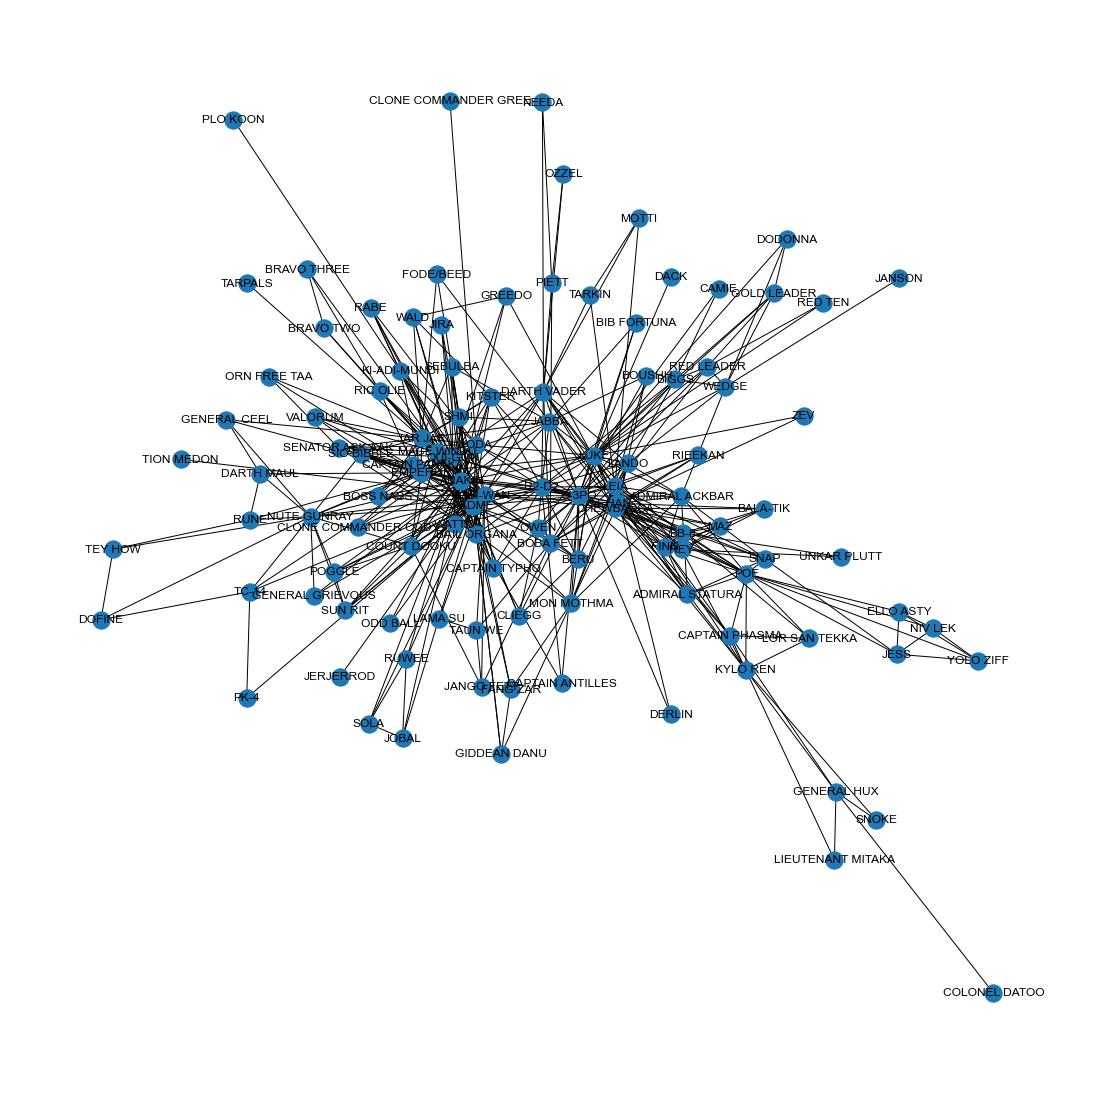

In [196]:
plt.figure(figsize=(15,15))

layout = nx.spring_layout(sw_G)
nx.draw(sw_G, layout, with_labels=True)

plt.show()

# Better Visualisation

### [netwulf: simple and interactive network visualization in Python](https://netwulf.readthedocs.io/en/latest/index.html)
<img src='https://raw.githubusercontent.com/benmaier/netwulf/master/img/logo_small.png' align="right" height="200">

Visualising networks using NetworkX can get complicated. But you can always pass a networkx Graph-objects to other tools to easily create beautifully looking network visualizations. Netwulf is such an interactive visualization tool for networkx Graph-objects.

In [259]:
# Install and import netwulf
! pip install netwulf
from netwulf import visualize

In [260]:
visualize(sw_G)

(None, None)

# Network Metrics


In [279]:
# Some helpful functions

# Sets the size attribute of our graph to whatever scores are passed in
def size_by(G,scores):
    nx.set_node_attributes(G,scores, name='size')
    return G

# sorts scores and shows the top n
def top_n(scores, n=10):
    top = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0:n]
    return top

# Of all the scores, degree does not conform to the same structure as everything else, so we MAKE IT!
def standardise_degree(degree_scores):
    return {name:score for name,score in degree_scores}

In [280]:
# Node degree - number of edges adjacent to that node
sw_G_degree = standardise_degree(sw_G.degree)
top_n(sw_G_degree)

[('ANAKIN', 42),
 ('OBI-WAN', 37),
 ('C-3PO', 36),
 ('PADME', 34),
 ('QUI-GON', 27),
 ('LUKE', 27),
 ('HAN', 26),
 ('LEIA', 25),
 ('JAR JAR', 24),
 ('R2-D2', 23)]

In [281]:
visualize(size_by(sw_G, sw_G_degree))

(None, None)

In [253]:
# Compute betweenness centrality — unweighted

betweenness = nx.betweenness_centrality(sw_G, normalized=False)
top_n(betweenness)

[('OBI-WAN', 1253.2109879529773),
 ('C-3PO', 1026.2745918679796),
 ('ANAKIN', 966.7994788578143),
 ('LUKE', 864.9757067594625),
 ('HAN', 588.4983296591214),
 ('DARTH VADER', 520.0201440097031),
 ('EMPEROR', 455.45646749086677),
 ('POE', 446.3752972730651),
 ('PADME', 415.9074143243325),
 ('CHEWBACCA', 373.9812171183446)]

In [254]:
# Compute betweenness centrality — weighted

betweenness = nx.betweenness_centrality(sw_G, weight='weight', normalized=False)
top_n(betweenness)

[('ANAKIN', 1202.1068378327977),
 ('C-3PO', 1185.2797400435647),
 ('OBI-WAN', 904.6883223423448),
 ('LUKE', 759.4728477558784),
 ('LEIA', 618.488805355666),
 ('JAR JAR', 524.652247632639),
 ('JABBA', 493.3019259268865),
 ('DARTH VADER', 488.3550849498177),
 ('HAN', 470.94493033205026),
 ('CAPTAIN PHASMA', 464.62445265432876)]

({'xlim': [0, 893],
  'ylim': [0, 893],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 'CHEWBACCA',
    'target': 'R2-D2',
    'width': 0.9397429877987296,
    'weight': 17},
   {'source': 'CHEWBACCA',
    'target': 'BB-8',
    'width': 0.6446583712203042,
    'weight': 8},
   {'source': 'CHEWBACCA',
    'target': 'OBI-WAN',
    'width': 0.5582905262390825,
    'weight': 6},
   {'source': 'CHEWBACCA',
    'target': 'C-3PO',
    'width': 1.4233671437735331,
    'weight': 39},
   {'source': 'CHEWBACCA',
    'target': 'LUKE',
    'width': 1.2893167424406085,
    'weight': 32},
   {'source': 'CHEWBACCA', 'target': 'HAN', 'width': 2, 'weight': 77},
   {'source': 'CHEWBACCA',
    'target': 'JABBA',
    'width': 0.39477101697586137,
    'weight': 3},
   {'source': 'CHEWBACCA',
    'target': 'LEIA',
    'width': 1.5790840679034455,
    'weight': 48},
   {'source': 'CHEWBACCA',
    'target': 'DARTH VADER',
    'width'

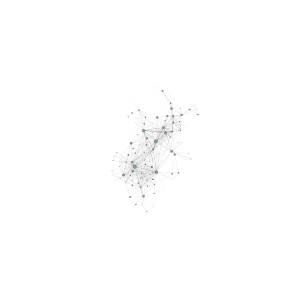

In [242]:
visualize(size_by(sw_G,betweenness))


In [255]:
# Compute eigenvector centrality

eigenvector = nx.eigenvector_centrality(sw_G)
top_n(eigenvector)

[('ANAKIN', 0.29656614921513713),
 ('OBI-WAN', 0.2810463592564618),
 ('C-3PO', 0.2753430975993981),
 ('PADME', 0.25800251613934716),
 ('QUI-GON', 0.2289683940348899),
 ('R2-D2', 0.2277137614367191),
 ('EMPEROR', 0.21093374567650905),
 ('LUKE', 0.1910749236779175),
 ('JAR JAR', 0.18640579189248807),
 ('YODA', 0.18114520894399294)]

({'xlim': [0, 893],
  'ylim': [0, 893],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 'CHEWBACCA',
    'target': 'R2-D2',
    'width': 0.9397429877987296,
    'weight': 17},
   {'source': 'CHEWBACCA',
    'target': 'BB-8',
    'width': 0.6446583712203042,
    'weight': 8},
   {'source': 'CHEWBACCA',
    'target': 'OBI-WAN',
    'width': 0.5582905262390825,
    'weight': 6},
   {'source': 'CHEWBACCA',
    'target': 'C-3PO',
    'width': 1.4233671437735331,
    'weight': 39},
   {'source': 'CHEWBACCA',
    'target': 'LUKE',
    'width': 1.2893167424406085,
    'weight': 32},
   {'source': 'CHEWBACCA', 'target': 'HAN', 'width': 2, 'weight': 77},
   {'source': 'CHEWBACCA',
    'target': 'JABBA',
    'width': 0.39477101697586137,
    'weight': 3},
   {'source': 'CHEWBACCA',
    'target': 'LEIA',
    'width': 1.5790840679034455,
    'weight': 48},
   {'source': 'CHEWBACCA',
    'target': 'DARTH VADER',
    'width'

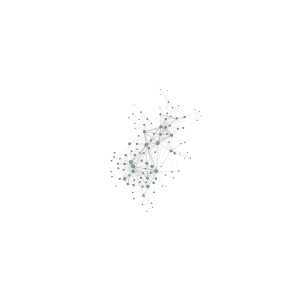

In [244]:
visualize(size_by(sw_G,eigenvector))


In [256]:
# Compute closeness centrality

closeness = nx.closeness_centrality(sw_G)
top_n(closeness)

[('C-3PO', 0.5670103092783505),
 ('OBI-WAN', 0.5641025641025641),
 ('ANAKIN', 0.5555555555555556),
 ('LUKE', 0.5314009661835749),
 ('R2-D2', 0.5213270142180095),
 ('HAN', 0.5164319248826291),
 ('EMPEROR', 0.5069124423963134),
 ('LEIA', 0.497737556561086),
 ('PADME', 0.4954954954954955),
 ('CHEWBACCA', 0.49327354260089684)]

({'xlim': [0, 893],
  'ylim': [0, 893],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 'CHEWBACCA',
    'target': 'R2-D2',
    'width': 0.9397429877987296,
    'weight': 17},
   {'source': 'CHEWBACCA',
    'target': 'BB-8',
    'width': 0.6446583712203042,
    'weight': 8},
   {'source': 'CHEWBACCA',
    'target': 'OBI-WAN',
    'width': 0.5582905262390825,
    'weight': 6},
   {'source': 'CHEWBACCA',
    'target': 'C-3PO',
    'width': 1.4233671437735331,
    'weight': 39},
   {'source': 'CHEWBACCA',
    'target': 'LUKE',
    'width': 1.2893167424406085,
    'weight': 32},
   {'source': 'CHEWBACCA', 'target': 'HAN', 'width': 2, 'weight': 77},
   {'source': 'CHEWBACCA',
    'target': 'JABBA',
    'width': 0.39477101697586137,
    'weight': 3},
   {'source': 'CHEWBACCA',
    'target': 'LEIA',
    'width': 1.5790840679034455,
    'weight': 48},
   {'source': 'CHEWBACCA',
    'target': 'DARTH VADER',
    'width'

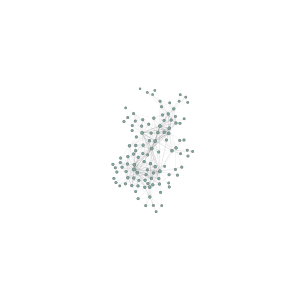

In [246]:
visualize(size_by(sw_G,closeness))


In [257]:
# Compute the number of triangles

triangles = nx.triangles(sw_G)
top_n(triangles)

[('ANAKIN', 168),
 ('C-3PO', 153),
 ('OBI-WAN', 145),
 ('PADME', 136),
 ('QUI-GON', 114),
 ('HAN', 100),
 ('R2-D2', 98),
 ('EMPEROR', 95),
 ('LEIA', 91),
 ('LUKE', 86)]

({'xlim': [0, 893],
  'ylim': [0, 893],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 'CHEWBACCA',
    'target': 'R2-D2',
    'width': 0.9397429877987296,
    'weight': 17},
   {'source': 'CHEWBACCA',
    'target': 'BB-8',
    'width': 0.6446583712203042,
    'weight': 8},
   {'source': 'CHEWBACCA',
    'target': 'OBI-WAN',
    'width': 0.5582905262390825,
    'weight': 6},
   {'source': 'CHEWBACCA',
    'target': 'C-3PO',
    'width': 1.4233671437735331,
    'weight': 39},
   {'source': 'CHEWBACCA',
    'target': 'LUKE',
    'width': 1.2893167424406085,
    'weight': 32},
   {'source': 'CHEWBACCA', 'target': 'HAN', 'width': 2, 'weight': 77},
   {'source': 'CHEWBACCA',
    'target': 'JABBA',
    'width': 0.39477101697586137,
    'weight': 3},
   {'source': 'CHEWBACCA',
    'target': 'LEIA',
    'width': 1.5790840679034455,
    'weight': 48},
   {'source': 'CHEWBACCA',
    'target': 'DARTH VADER',
    'width'

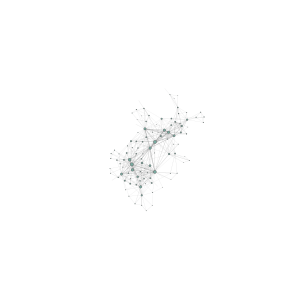

In [248]:
visualize(size_by(sw_G,triangles))


In [258]:
# Compute clustering

clustering = nx.clustering(sw_G)
top_n(clustering)

[('WATTO', 1.0),
 ('CAPTAIN ANTILLES', 1.0),
 ('RIEEKAN', 1.0),
 ('BALA-TIK', 1.0),
 ('MAZ', 1.0),
 ('UNKAR PLUTT', 1.0),
 ('PK-4', 1.0),
 ('BOSS NASS', 1.0),
 ('SEBULBA', 1.0),
 ('JIRA', 1.0)]

In [250]:
visualize(size_by(sw_G,clustering))


(None, None)

In [229]:
# Compute the average shortest path for the network

nx.average_shortest_path_length(sw_G)

2.664045864045864

In [230]:
# Get the distance from Luke to any other character

nx.shortest_path_length(sw_G, 'LUKE')

{'LUKE': 0,
 'OBI-WAN': 1,
 'BIB FORTUNA': 1,
 'LEIA': 1,
 'JABBA': 1,
 'CHEWBACCA': 1,
 'WEDGE': 1,
 'CAMIE': 1,
 'MON MOTHMA': 1,
 'C-3PO': 1,
 'LANDO': 1,
 'ANAKIN': 1,
 'R2-D2': 1,
 'DACK': 1,
 'DARTH VADER': 1,
 'GOLD LEADER': 1,
 'HAN': 1,
 'BIGGS': 1,
 'OWEN': 1,
 'RED TEN': 1,
 'ZEV': 1,
 'ADMIRAL ACKBAR': 1,
 'DODONNA': 1,
 'YODA': 1,
 'EMPEROR': 1,
 'REY': 1,
 'BERU': 1,
 'RED LEADER': 1,
 'JERJERROD': 2,
 'UNKAR PLUTT': 2,
 'NUTE GUNRAY': 2,
 'CLIEGG': 2,
 'BRAVO THREE': 2,
 'POGGLE': 2,
 'COUNT DOOKU': 2,
 'CAPTAIN PHASMA': 2,
 'RIEEKAN': 2,
 'CAPTAIN TYPHO': 2,
 'MACE WINDU': 2,
 'MAZ': 2,
 'CLONE COMMANDER GREE': 2,
 'CAPTAIN PANAKA': 2,
 'FANG ZAR': 2,
 'SENATOR ASK AAK': 2,
 'SNAP': 2,
 'TARKIN': 2,
 'JOBAL': 2,
 'SHMI': 2,
 'SUN RIT': 2,
 'FODE/BEED': 2,
 'NEEDA': 2,
 'GENERAL CEEL': 2,
 'CLONE COMMANDER CODY': 2,
 'PIETT': 2,
 'RUWEE': 2,
 'SIO BIBBLE': 2,
 'ORN FREE TAA': 2,
 'QUI-GON': 2,
 'TION MEDON': 2,
 'BOSS NASS': 2,
 'BAIL ORGANA': 2,
 'DERLIN': 2,
 'JAR JAR'

In [231]:
# Get the shortes path between any two characters
nx.shortest_path(sw_G, 'LUKE','DARTH VADER')

['LUKE', 'DARTH VADER']

### Acknowledgements
* Notebook adapted from original teaching materials by Dr. Valentin Danchev.
* Menczer, F., Fortunato, S., Davis, C. 2020. A first course in network science. Cambridge University Press.
* Rob Chew’s and Peter Baumgartner’s tutorial “Connected: A Social Network Analysis Tutorial with NetworkX”. PyData 2016.
* Edward L. Platt. 2020. Network Science with Python and NetworkX Quick Start Guide: Explore and visualize network data effectively. Packt Publishing.

In [ ]:
# You can now do interactive styling of your network visualization in the browser
tweet_G = nx.from_pandas_edgelist(pd.read_csv('retweet_edge_list.csv'), create_using=nx.Graph)

# tweet_G = filter_by_giant_component(filter_by_degree(tweet_G,2))
tweet_G.remove_edges_from(nx.selfloop_edges(tweet_G))
tweet_G = nx.k_core(tweet_G, k=3)

comms, modularity = louvain_modularity(tweet_G)
nx.set_node_attributes(tweet_G,comms['community'].to_dict(), name='group')
visualize(tweet_G)

In [92]:
def filter_by_degree(G, minimum_degree):
    scores = G.degree()
    remove_nodes = [node for node,degree in scores if degree < minimum_degree]
    G.remove_nodes_from(remove_nodes)
    return G

def filter_by_giant_component(G):
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(components[0])

def louvain_modularity(G,weight='weight', resolution=1):
    communities = nx.algorithms.community.louvain_communities(G, weight=weight, resolution=resolution)
    modularity_score = nx.algorithms.community.modularity(G,communities, weight=weight)
    com_node_assignments = []
    for community, nodes in enumerate(communities):
        for node in nodes:
            com_node_assignments.append({'community':community, 'node':node})
    return pd.DataFrame(com_node_assignments).set_index('node', drop=True), modularity_score